In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

try:
    from google.colab import drive
    drive.mount('/content/drive')
    workding_dir = "/content/drive/MyDrive/logical-reasoning/"
except ModuleNotFoundError:
    workding_dir = str(Path.cwd().parent)

In [3]:
import os
import sys

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/Library/CloudStorage/GoogleDrive-dh.huang.2023@smu.edu.sg/My Drive/logical-reasoning


In [4]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/Library/CloudStorage/GoogleDrive-dh.huang.2023@smu.edu.sg/My Drive/logical-reasoning/.env


True

In [5]:
import pandas as pd

df = pd.read_csv("datasets/mgtv/train_en.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    25000 non-null  object 
 1   label   25000 non-null  object 
 2   answer  0 non-null      float64
 3   title   25000 non-null  object 
 4   puzzle  25000 non-null  object 
 5   truth   25000 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.1+ MB


In [7]:
df["label"].value_counts()

label
No                       11783
Yes                       6591
Unimportant               5076
Incorrect questioning      921
Correct answer             629
Name: count, dtype: int64

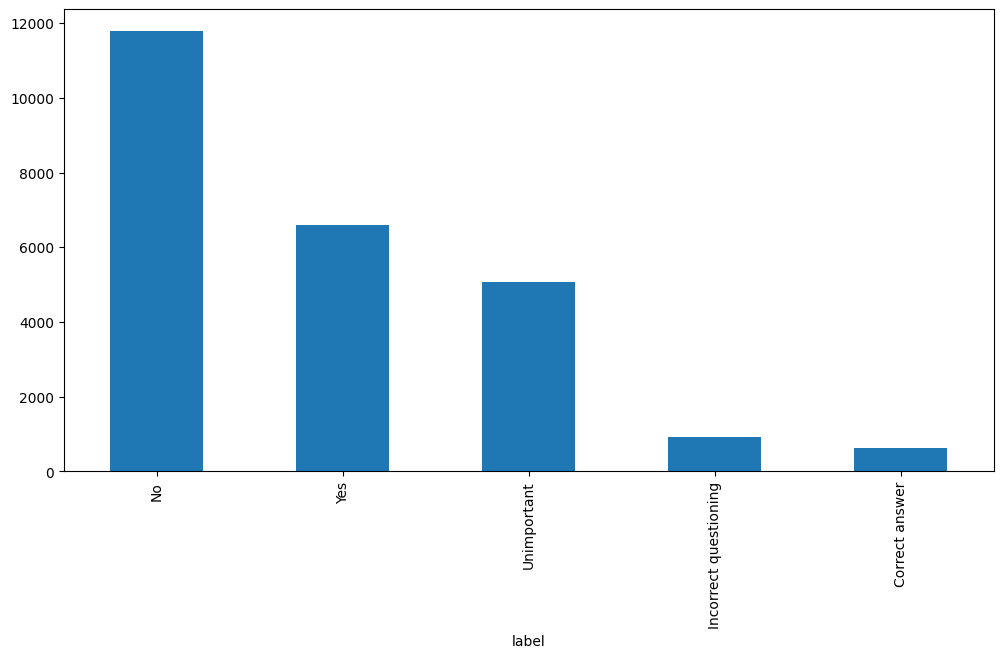

In [8]:
import matplotlib.pyplot as plt
from matplotlib import rcParams


plt.figure(figsize=(12, 6))
df["label"].value_counts().plot(kind="bar")
plt.show()

In [9]:
df["puzzle"].value_counts()

puzzle
One night, in the dead of night, Jia Jia and his friends ran out of the longtang on their way home from work, their faces full of terror. In the distance, a trash bin, empty and overturned, lay on the ground. Jia Jia was not a resident of the longtang, nor had he caused any trouble with anyone. What was the reason for his panic?                                                                                                                                                                 10058
In the basement of an old residential building. One day, the police received a report that someone had found Zhen Haoqi's body in the basement. There were no signs of a struggle and no obvious suicide tools. The deceased was found sitting in a chair, with a calm expression, as if he had not experienced any pain before death. There was nothing in the basement except for a TV and a table. There was a glass of water on the table, and the TV was still on. What caused Zhen Haoqi's death?     9345

In [10]:
df["truth"].value_counts()

truth
It turned out that Jia Qijia was a petty thief on the run. That night, he was trying to find a target to steal from in the alley. But he was so scared that he didn't even notice a wild cat suddenly jumping out of the trash bin and scaring him. Thinking that the police had caught him, he ran away in a panic. The trash bin was where he had accidentally knocked over while searching for something.                                                                                                                                                                                                                                                                                                                                                10058
Although he was a science fiction author, Jindao suffered from severe claustrophobia. He often went to the underground room alone to watch science fiction movies in the hope of finding inspiration. Unfortunately, one day he was watching a movie when the po

In [11]:
len(df["title"].value_counts()), len(df["puzzle"].value_counts()), len(df["truth"].value_counts())

(16, 16, 16)

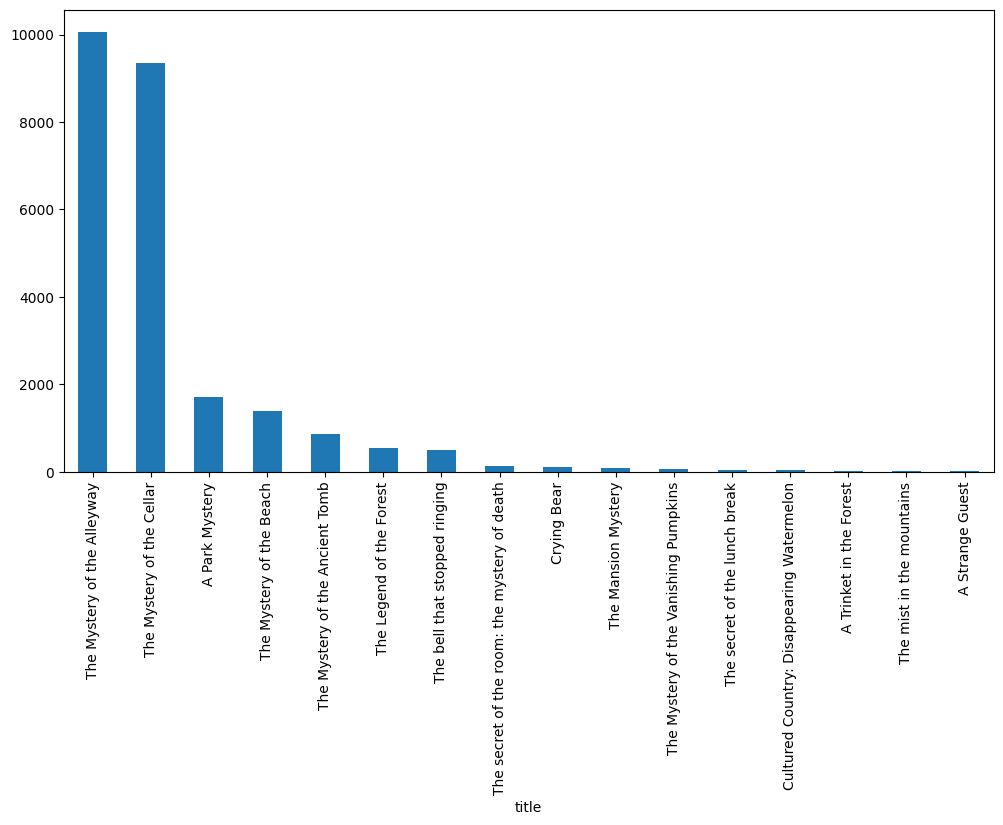

In [12]:
import matplotlib.pyplot as plt
from matplotlib import rcParams


plt.figure(figsize=(12, 6))
df["title"].value_counts().plot(kind="bar")
plt.show()

In [13]:
df_dev = pd.read_csv("datasets/mgtv/dev_en.csv")
len(df_dev["title"].value_counts()), len(df_dev["puzzle"].value_counts()), len(
    df_dev["truth"].value_counts()
)

(5, 5, 5)

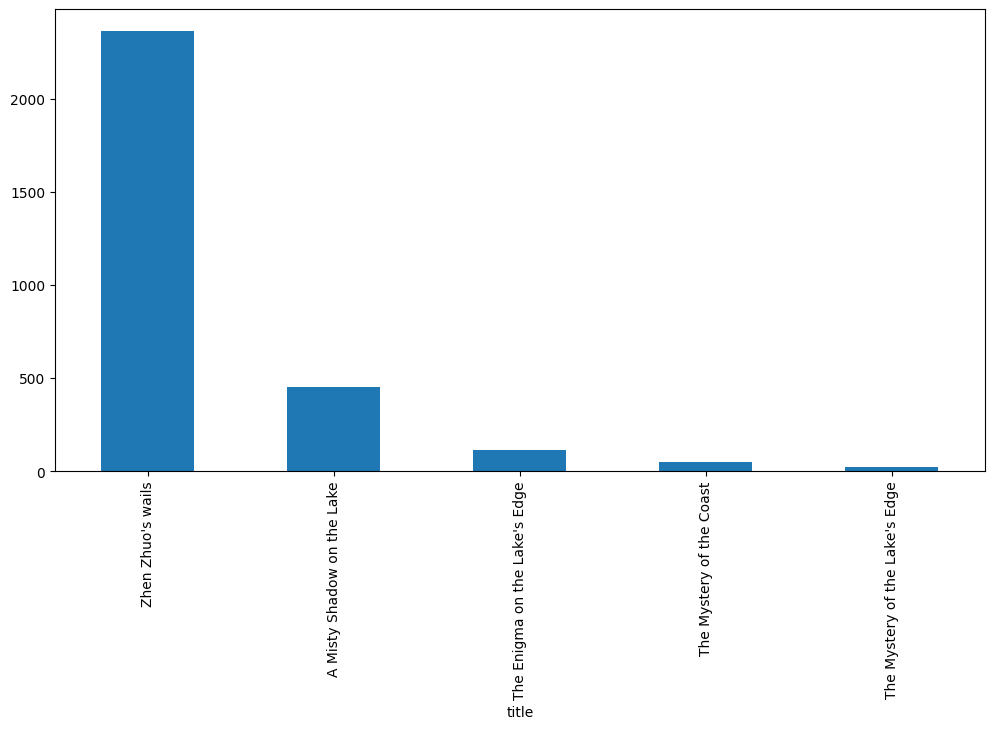

In [14]:
import matplotlib.pyplot as plt
from matplotlib import rcParams


plt.figure(figsize=(12, 6))
df_dev["title"].value_counts().plot(kind="bar")
plt.show()

In [15]:
# print details of the first row
for col in df_dev.columns:
    print("-" * 50)
    print(f"{col}: {df_dev[col].iloc[0]}")

--------------------------------------------------
text: Was Zhen Zhesuo suicide?
--------------------------------------------------
label: No
--------------------------------------------------
answer: nan
--------------------------------------------------
title: The Mystery of the Coast
--------------------------------------------------
puzzle: In the quiet seaside cottage of a neighbor, a morning in which a body was found on the beach, the cause of death was never determined.
--------------------------------------------------
truth: Zhen Zhesao was a nature-loving painter who came to this coastal cottage every year to find inspiration. In his final days, he was working on a painting of marine life. The day before the painting was finished, he went out on his bike to watch the night scene at the beach. However, he found a stranded dolphin on the beach and spent a lot of energy trying to rescue it. Exhausted, he fell asleep on the beach, having a heart condition that was so severe that